In [1]:
# importing stuffs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

In [ ]:
# import gensim
# import gensim.downloader as model_api

# # Load pretrained word embeddings
# # This will download 60mb of data the first time it's loaded
# word_vectors = model_api.load("glove-wiki-gigaword-100")

In [2]:
song = pd.read_csv(r'data/songs.csv', index_col=0, header='infer')
song = song.dropna()
song.reset_index(drop=True, inplace=True)

In [3]:
song

,title,genre,lyrics
0,Abilene,Country/Bluegrass,Abilene Abilene prettiest town I've ever seen\...
1,Above And Beyond (The Call Of Love),Country/Bluegrass,Well I'll give you love that's above and beyon...
2,AC/DC Current,Jazz,"Y'all know me, still the same Eevee\nThe old 1..."
3,Acadian Driftwood,Folk/Roots,The war was over\nAnd the spirit was broken\nT...
4,Ac-Cent-Tchu-Ate The Positive,Swing,"Gather 'round me, everybody\nGather 'round me,..."
...,...,...,...
4754,Zeebob,Jazz,Part One Chapter 10\nTo Kill a Mockingbird\n\n...
4755,Zig Zag Wanderer,Rock/Pop,"Zig zag\n\nZig zag wanderer, zig zag wanderer\..."
4756,Ziggy Stardust,Rock/Pop,Ground Control to Major Tom\nGround Control to...
4757,Zip-A-Dee-Doo-Dah,Musical/Film,"Zip-a-dee-doo-dah\nZip-a-dee-yae\nMy, my, my, ..."


In [10]:
def remove_punct(text, chop_it=False):
    newtext = text.lower()
    newtext = newtext.replace('\n', ' ')
    newtext = re.sub(r'[^\w\s]',' ',newtext)
    newtext = re.sub(r'_',' ', newtext)
    newtext = newtext.replace('  ', ' ')
    return newtext.split() if chop_it else newtext

In [69]:
def soft_get(w):
    try:
        return word_vectors[w] #either get the word or return 0s
    except KeyError:
        return np.zeros(word_vectors.vector_size)

def makeDict(words):
    d = {}
    for i in range(len(words)):
        if len(words[i]) > 1:
            d[i] = sum([soft_get(each) for each in words[i]])
        elif len(words[i]) == 1:
            d[i] = soft_get(words[i][0])
        else:
            d[i] = np.zeros(word_vectors.vector_size)
    return d

## Ver 1: Just removing punctuation 

In [68]:
# 1st iteration. Just removing punctuation 
df = song.copy()
df['lyrics'] = df.lyrics.apply(lambda x: remove_punct(x, True))
df

,title,genre,lyrics
0,Abilene,Country/Bluegrass,"[abilene, abilene, prettiest, town, i, ve, eve..."
1,Above And Beyond (The Call Of Love),Country/Bluegrass,"[well, i, ll, give, you, love, that, s, above,..."
2,AC/DC Current,Jazz,"[y, all, know, me, still, the, same, eevee, th..."
3,Acadian Driftwood,Folk/Roots,"[the, war, was, over, and, the, spirit, was, b..."
4,Ac-Cent-Tchu-Ate The Positive,Swing,"[gather, round, me, everybody, gather, round, ..."
...,...,...,...
4754,Zeebob,Jazz,"[part, one, chapter, 10, to, kill, a, mockingb..."
4755,Zig Zag Wanderer,Rock/Pop,"[zig, zag, zig, zag, wanderer, zig, zag, wande..."
4756,Ziggy Stardust,Rock/Pop,"[ground, control, to, major, tom, ground, cont..."
4757,Zip-A-Dee-Doo-Dah,Musical/Film,"[zip, a, dee, doo, dah, zip, a, dee, yae, my, ..."


In [71]:
np.unique(df.genre, return_counts=True)

(array(['Blues', 'Classical/ Contemporary', 'Country/Bluegrass',
        'Dance/Electronica', 'Folk/Roots', 'Gospel', 'Hip-Hop', 'Jazz',
        'Musical/Film', 'R & B/Soul', 'Ragtime', 'Reggae', 'Rock/Pop',
        'Swing'], dtype=object),
 array([ 262,   13,  424,  319,  365,   39,  386,  745,  434,  489,   11,
          84, 1157,   31], dtype=int64))

In [306]:
gen, gen_count = np.unique(df.genre, return_counts=True)
pd.DataFrame({'genre':gen, 'count':gen_count})

,genre,count
0,Blues,262
1,Classical/ Contemporary,13
2,Country/Bluegrass,424
3,Dance/Electronica,319
4,Folk/Roots,365
5,Gospel,39
6,Hip-Hop,386
7,Jazz,745
8,Musical/Film,434
9,R & B/Soul,489


In [70]:
emb = pd.DataFrame.from_dict(makeDict(df['lyrics']), 'index')
emb

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.407994,9.505653,18.362978,-35.067537,-17.541227,30.164360,-1.925850,26.565303,-16.385911,2.774676,...,-2.459695,-9.390766,4.664184,7.706790,-49.127599,-6.657059,-5.127834,-6.589581,28.898955,23.689097
1,-11.412120,47.562717,55.015491,-35.252678,-36.474579,27.729155,-21.368063,20.454735,-9.570341,-8.003919,...,-24.244877,-6.899703,6.040519,-0.795089,-60.615440,-11.074569,-21.520372,-40.457687,34.410061,41.242985
2,-97.618327,173.681647,268.197522,-227.093494,-164.129420,160.918705,-44.934286,154.474341,-66.149166,-22.935701,...,-49.445678,-55.930740,-46.812951,73.855961,-277.583648,-89.577427,-163.704142,-155.141238,285.842518,150.713110
3,-51.045876,40.017147,139.653231,-102.785897,-65.059516,64.400375,-15.919125,87.887442,-58.030972,3.182927,...,-17.724892,-56.472920,-36.299396,78.740887,-194.420300,-62.320771,-94.206308,-81.405279,177.436109,85.177673
4,-8.721982,31.113450,64.712426,-66.459138,-44.705000,43.106763,-39.517646,45.531515,-32.047413,-12.111400,...,-18.865377,-22.117646,-33.077718,23.354845,-74.224849,-19.640334,-35.406995,-47.407702,88.720571,36.361622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,-102.520497,396.237686,1055.755267,-1019.461531,-516.900238,827.629858,-349.052940,711.680797,-384.947896,-78.468179,...,-85.611444,-651.278402,29.198435,524.052269,-1600.797170,-161.878205,-694.534358,-554.151322,1150.922379,683.579973
4755,-1.548258,40.173019,17.902245,-67.731773,-47.918880,37.371002,-2.089738,53.332870,-7.387150,-17.886852,...,-47.593452,0.013193,2.998157,-3.574604,-30.418289,-32.179436,5.423189,-36.043564,41.431915,34.163765
4756,-42.586067,62.108696,87.445503,-60.812107,-40.427952,35.810196,-36.572166,48.627117,-31.880239,-16.537447,...,-16.914915,-1.088758,-3.729301,25.615433,-110.638657,-0.788731,-49.170372,-66.459610,100.863922,44.789970
4757,-65.836669,8.748106,59.165012,-107.053857,-36.067382,28.512010,14.508009,63.929274,42.556104,-15.581257,...,9.982470,28.130648,-36.521619,5.682187,3.410542,-27.677795,-6.007572,-128.007625,27.766070,25.999562


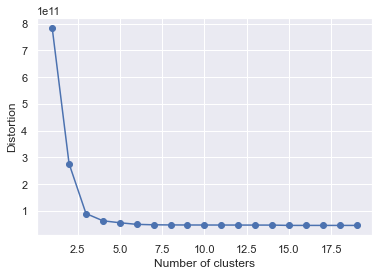

In [72]:
from sklearn.cluster import KMeans

# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
# calculate distortion for a range of number of cluster
X = emb.values
distortions = []
k_min = 1
k_max = 20
for i in range(k_min, k_max):
    km = KMeans(
        n_clusters=i, init='random',
        max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

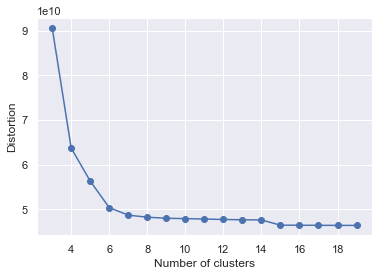

In [74]:
# need to zoom in at the bottom, since k = 1 - 3 got too high distortion
k_min = 3
k_max = 20
# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

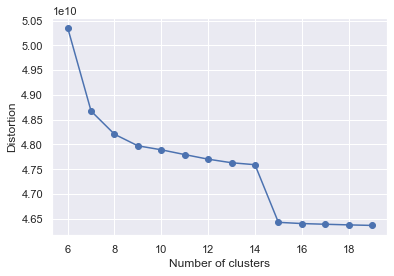

In [79]:
# need to zoom in at the bottom, since k = 6 - 20 got too high distortion
k_min = 6
k_max = 20
# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

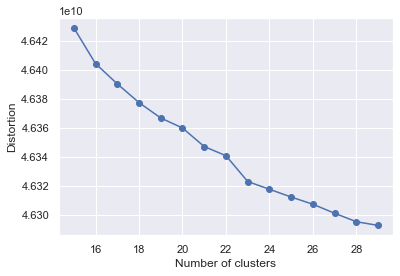

In [80]:
# 14 or 15 seems promising
X = emb.values
distortions = []
k_min = 15
k_max = 30
for i in range(k_min, k_max):
    km = KMeans(
        n_clusters=i, init='random',
        max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

> No more elbow present, $14$ and $15$ seems to be a good candidate (not choosing $15$ right away because the big drop in distortion could indicate overfitting)

In [117]:
# lets try 14
cluster_num = 14
model_kmean = KMeans(n_clusters=cluster_num, init='random', max_iter=300, tol=1e-04, random_state=0)
model_kmean.fit(emb.values)

KMeans(init='random', n_clusters=14, random_state=0)

In [118]:
model_kmean.labels_

array([10, 10,  4, ...,  7, 10,  2])

In [119]:
df['genre_num'] = pd.get_dummies(df.genre)@np.arange(14)

In [225]:
df[['genre', 'genre_num']].drop_duplicates()\
                            .reset_index(drop=True)\
                            .set_index(['genre_num'])\
                            .sort_index()

,genre
genre_num,
0,Blues
1,Classical/ Contemporary
2,Country/Bluegrass
3,Dance/Electronica
4,Folk/Roots
5,Gospel
6,Hip-Hop
7,Jazz
8,Musical/Film


In [256]:
def plot_histogram(model, df = df):
    # plotting histogram for each cluster
    n_clusters = model.n_clusters
    fig, axes = plt.subplots(nrows=np.int(np.ceil(n_clusters/2)), 
                             ncols=2, 
                             sharex = False,
                             figsize=(18,5*np.int(np.ceil(n_clusters/2)))
                            )
    df_temp = pd.DataFrame({'genre': df.genre.unique(), 'count':[0]*n_clusters}).set_index('genre')
    for i in range(n_clusters):
        ax = axes[i//2, i%2]
        val, count = np.unique(df['genre'].iloc[model.labels_==i], return_counts=True)
        (df_temp + pd.DataFrame({'genre':val, 'count':count}).set_index('genre')).plot(kind='bar', ax=ax)
        ax.set_title(f'cluster: {i}')
        ax.set_ylabel('count')
        ax.set_xlabel('actual genre')
        ax.set_xlim(right=n_clusters + 0.25)
#         ax.set_xticks([*range(n_clusters)])
    return fig

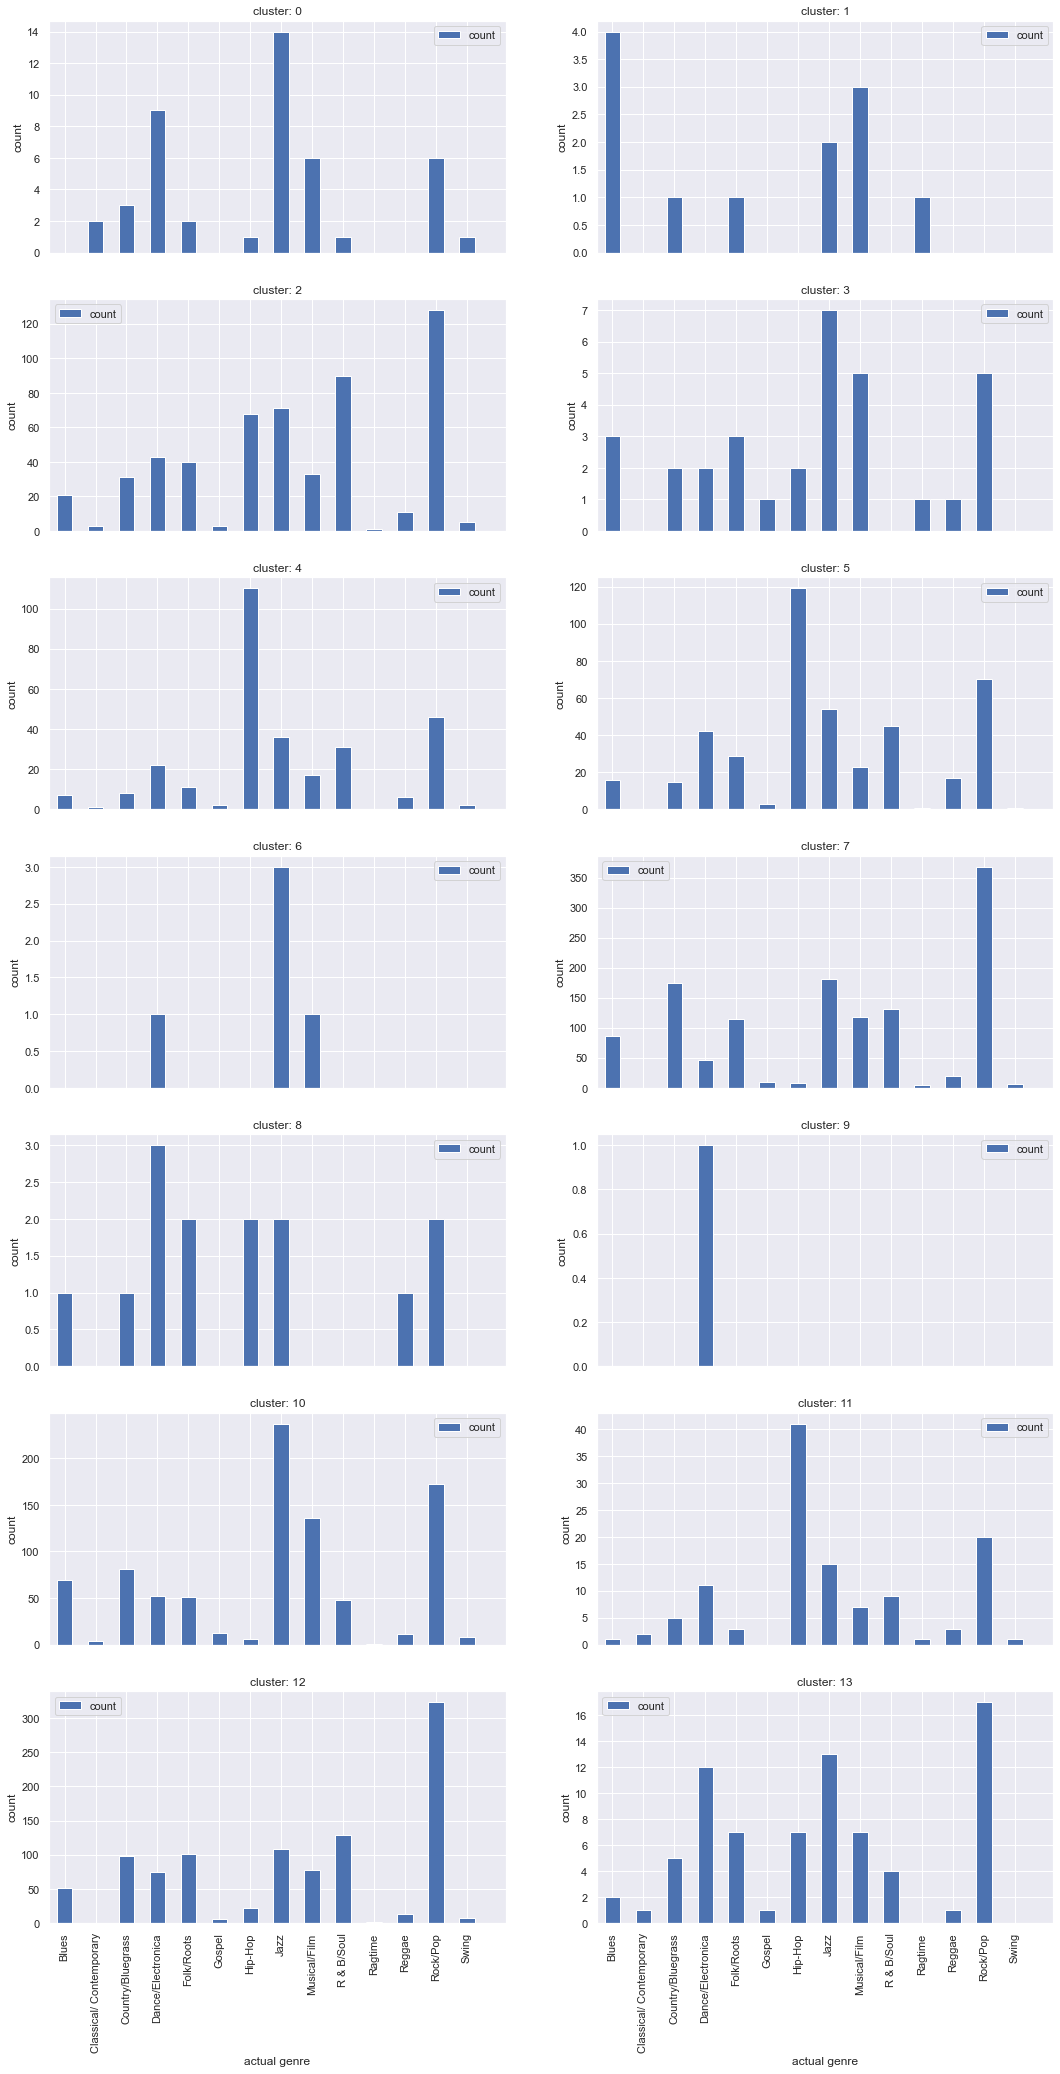

In [227]:
f_hist = plot_histogram(model_kmean)

In [228]:
f_hist.savefig(r'assets/hist.png')

In [224]:
# getting stats for each label
label = 10
val, count = np.unique(df['genre'].iloc[model_kmean.labels_==label], return_counts=True)
display(pd.DataFrame({'genre':val, 'count':count}).sort_values('count'))
# pd.DataFrame({'genre':val, 'count':count}).set_index('genre').plot(kind='bar')

,genre,count
10,Ragtime,1
1,Classical/ Contemporary,4
6,Hip-Hop,6
13,Swing,8
11,Reggae,11
5,Gospel,13
9,R & B/Soul,48
4,Folk/Roots,51
3,Dance/Electronica,52
0,Blues,69


In [161]:
# dimensionality reduction for viz
import umap
data = emb.values
# using UMAP as manifold model
# fig, ax = plt.subplots(figsize=(10, 10))
model_viz = umap.UMAP(n_neighbors=20, n_components=3)
reduced_emb = model_viz.fit_transform(data)

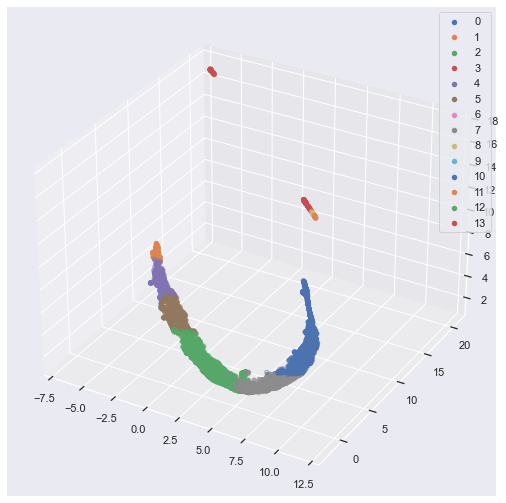

In [230]:
a = pd.DataFrame({'x':reduced_emb[:,2], 'y':reduced_emb[:,0], 'z':reduced_emb[:,1], 'label':model_kmean.labels_})

plt.figure('K-Means on lyrics', figsize=(12,9))
ax = plt.axes(projection = '3d')

for i in range(model_kmean.n_clusters):
    each = a[a.label==i][list('xyz')].values
    ax.scatter(each[:,2],each[:,1],each[:,0], label=f'{i}')

ax.legend()
plt.savefig(r'assets/3dviz.png')
plt.show()

In [ ]:
# seems like it does a good job for pop/rock, and hip-hop

# Ver 2: removing stop words

In [231]:
def get_stop_words():
    '''
    RETURN:
    an array of lower case stop words
    '''
    # https://github.com/stopwords-iso/stopwords-en/blob/master/stopwords-en.txt
    import requests
    r = requests.get('https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt')
    return r.text.split('\n')

In [264]:
# stop_words = get_stop_words()

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stop(arr, stop_words=stop_words):
    '''
    INPUT:
    arr : [list, or array]
        List of words in the text with all lower cases.
    '''
    new_arr = []
    for word in arr:
        w = word.lower()
        if w in stop_words:
            continue 
        else:
            new_arr.append(w)
    return new_arr

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pui_s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [265]:
l = song.lyrics.apply(lambda x: remove_punct(x, True)).apply(remove_stop)

In [266]:
l.head()

0    [abilene, abilene, prettiest, town, ever, seen...
1    [well, give, love, beyond, call, love, never, ...
2    [know, still, eevee, old, 133, low, key, tryna...
3    [war, spirit, broken, hills, smokin, men, with...
4    [gather, round, everybody, gather, round, prea...
Name: lyrics, dtype: object

In [267]:
emb2 = pd.DataFrame.from_dict(makeDict(l), 'index')
emb2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.307229,2.796535,7.023488,-19.136878,-3.355052,19.187661,1.891864,14.995666,-7.091267,4.463043,...,0.658867,-3.560598,2.142149,3.597775,-30.407129,-5.128288,7.508759,4.487902,15.638384,14.039369
1,3.107224,15.751699,20.439030,-8.851347,-5.279609,13.204437,-8.296161,2.190791,1.487850,-10.767777,...,-6.271502,-6.406650,3.155954,-8.746060,-24.241501,-5.337519,-14.178160,-7.465948,8.004562,15.638920
2,-54.987787,73.924386,93.918981,-101.749402,-53.463250,55.897865,-12.373477,27.236192,-19.034748,-33.250472,...,-0.520060,-16.088604,-31.388528,-1.108024,-87.285631,-56.388669,-57.795750,-37.722718,115.493437,31.709110
3,-34.144807,23.025955,65.177036,-44.609242,-46.620821,14.001551,15.732301,38.036362,-15.075352,-17.612391,...,-8.008571,-29.088233,-0.192594,41.271419,-84.920718,-28.665241,-40.475490,-26.715392,68.951133,34.477017
4,-1.299568,16.440972,15.773039,-29.614764,-25.661526,17.903903,-11.748800,12.109408,-0.960486,-14.405581,...,-7.917115,-6.120957,-7.807676,1.518385,-2.655130,-8.064502,2.324267,-13.073192,21.831519,12.589092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,2.143357,142.764029,355.330286,-487.482457,-257.222086,356.377273,-125.786623,269.847102,-9.834218,-261.004108,...,100.252137,-268.966105,72.773494,61.904293,-663.345531,-81.848460,-237.515807,-11.102571,318.326626,292.174928
4755,19.901211,10.202667,-11.253121,-38.584358,-25.040646,17.670862,11.314275,34.411312,-9.914721,-9.521461,...,-25.221098,-2.537663,-7.614420,4.046566,-4.196208,-23.922401,5.078673,-5.379037,10.693985,8.690364
4756,-20.098597,25.653576,36.972420,-28.303535,-6.640847,8.728454,-13.278587,13.176940,-21.704891,-16.881516,...,4.557000,-2.395517,-9.734916,10.109382,-57.024189,4.069071,-25.556526,-15.473799,44.829876,9.634017
4757,-56.479512,1.902270,35.667409,-90.504133,-40.048884,3.241760,13.529345,41.741809,50.056774,-30.789425,...,6.020354,26.453227,-31.806632,-4.702484,23.564480,-18.737869,2.686830,-102.222640,-3.625901,1.696886


In [268]:
cluster_num = 14
model_kmean2 = KMeans(n_clusters=cluster_num, init='random', max_iter=300, tol=1e-04, random_state=0)
model_kmean2.fit(emb2.values)

KMeans(init='random', n_clusters=14, random_state=0)

In [269]:
model_kmean2.labels_

array([ 8,  8, 13, ...,  5,  8,  1])

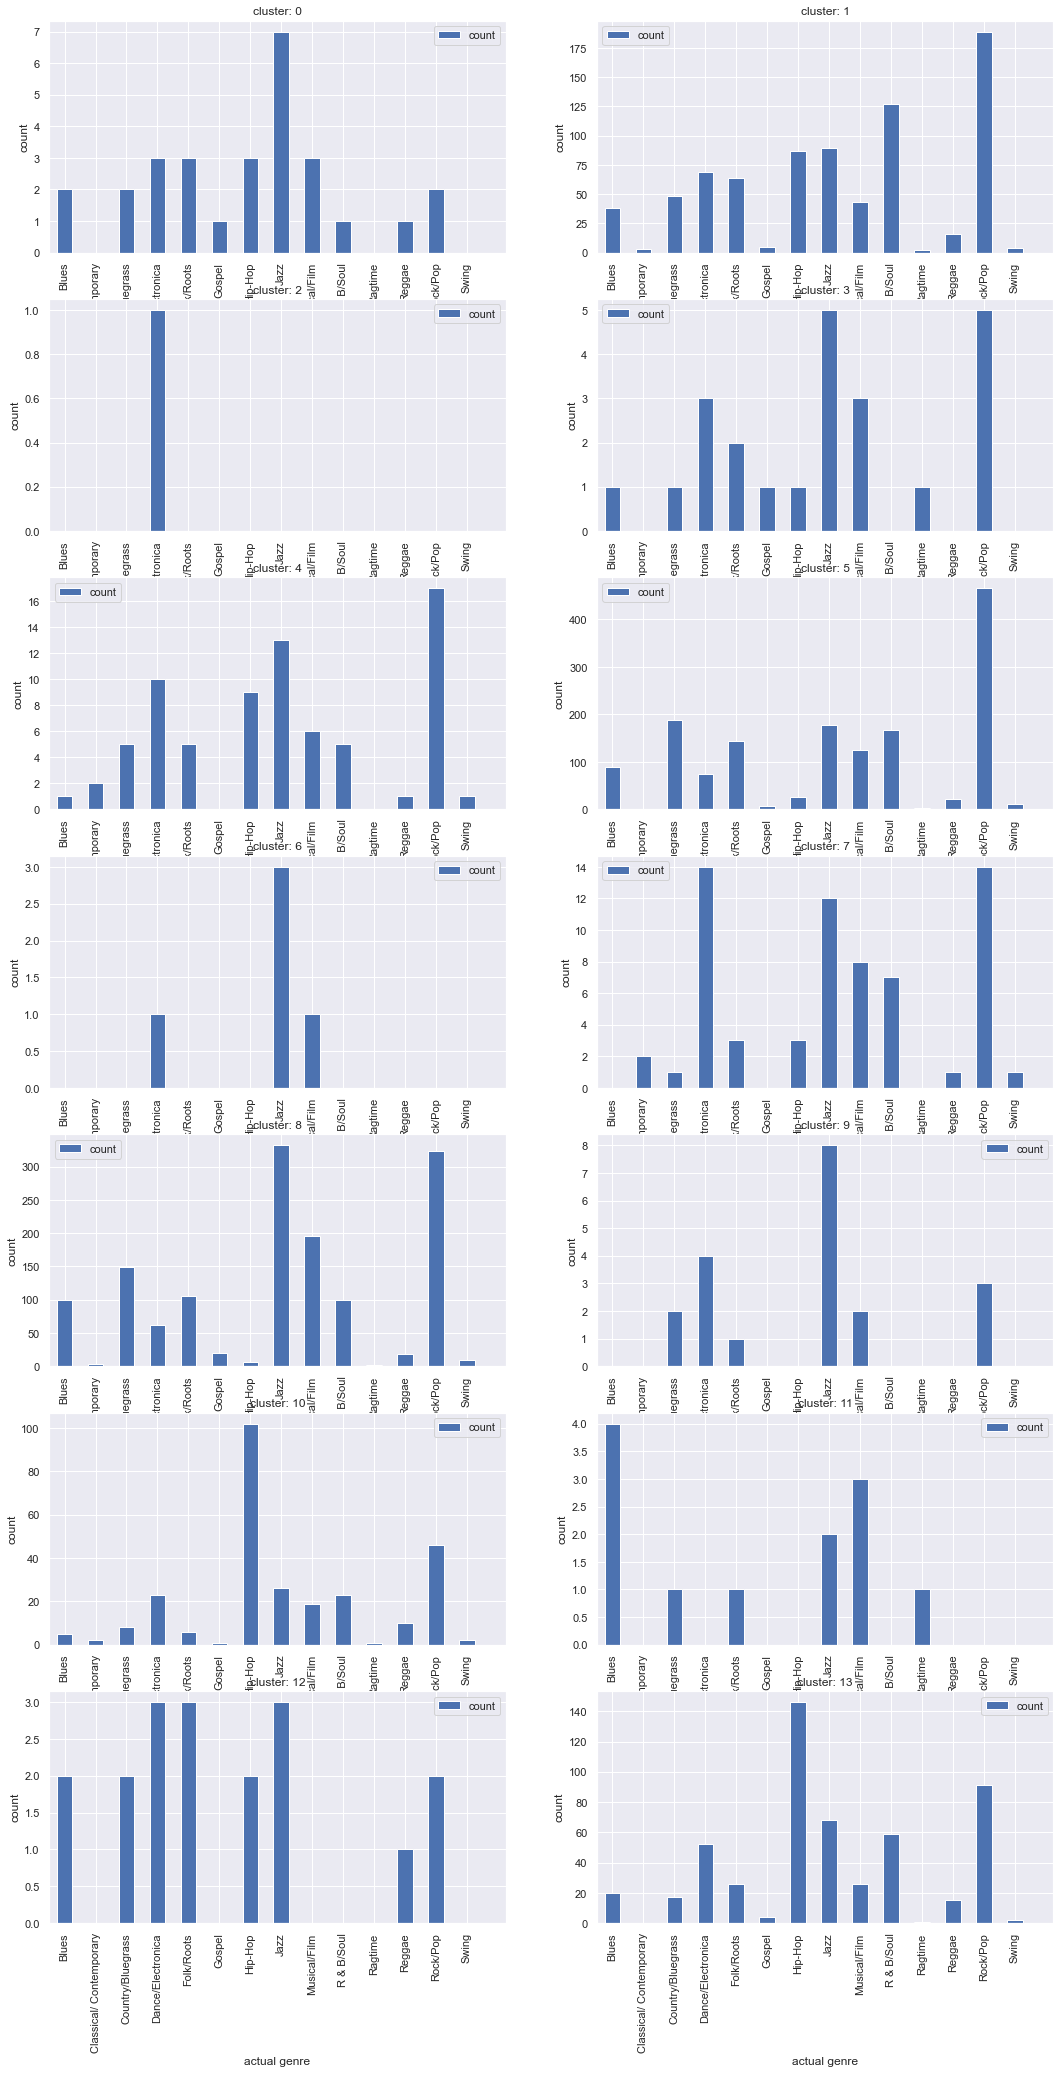

In [270]:
f_hist2 = plot_histogram(model_kmean2)

In [271]:
# dimensionality reduction for viz
import umap
data2 = emb2.values
# using UMAP as manifold model
# fig, ax = plt.subplots(figsize=(10, 10))
model_viz2 = umap.UMAP(n_neighbors=20, n_components=3)
reduced_emb2 = model_viz2.fit_transform(data2)

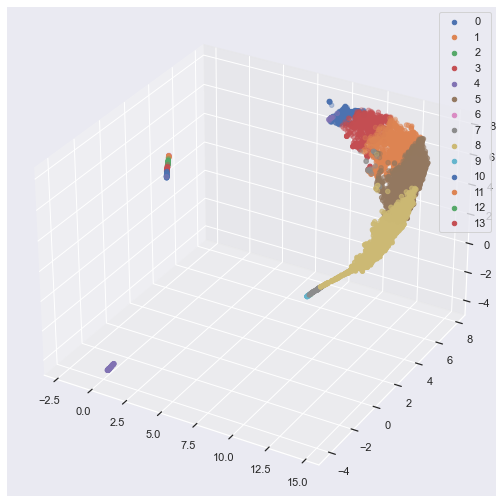

In [272]:
a = pd.DataFrame({'x':reduced_emb2[:,2], 
                  'y':reduced_emb2[:,2], 
                  'z':reduced_emb2[:,0], 'label':model_kmean2.labels_})

plt.figure('K-Means on lyrics', figsize=(12,9))
ax = plt.axes(projection = '3d')

for i in range(model_kmean2.n_clusters):
    each = a[a.label==i][list('xyz')].values
    ax.scatter(each[:,2],each[:,1],each[:,0], label=f'{i}')

ax.legend()
# plt.savefig(r'assets/3dviz.png')
plt.show()

# Ver 3: using google word2vec on removed punct and stop words

In [277]:
# from gensim import models
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
w = gensim.models.KeyedVectors.load_word2vec_format(r'../GoogleNews-vectors-negative300.bin', binary=True)

In [295]:
def soft_get(w, word_vectors):
    try:
        return word_vectors[w] #either get the word or return 0s
    except KeyError:
        return np.zeros(word_vectors.vector_size)

def makeDict(words, word_vectors):
    d = {}
    for i in range(len(words)):
        if len(words[i]) > 1:
            d[i] = sum([soft_get(each, word_vectors) for each in words[i]])
        elif len(words[i]) == 1:
            d[i] = soft_get(words[i][0], word_vectors)
        else:
            d[i] = np.zeros(word_vectors.vector_size)
    return d

In [296]:
emb300 = pd.DataFrame.from_dict(makeDict(l, w), 'index')
emb300

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.147400,1.950195,1.585205,4.201294,-1.043076,-0.340393,1.474060,-2.576370,1.241455,2.863220,...,-1.310852,1.178833,-2.300461,0.803452,-0.567383,-1.026978,-0.942142,-1.216629,2.088585,-1.488037
1,1.620209,-0.549500,-0.312958,5.301086,-2.534004,0.480701,6.180954,-5.169165,2.136560,4.882294,...,-1.812927,3.394104,-4.097839,-3.925232,-2.364838,-1.406235,1.988464,-4.159012,1.240173,-2.922333
2,16.337158,20.617506,6.303082,26.888474,-26.549093,-5.649918,5.380272,-36.470825,14.802011,44.527016,...,-8.612198,16.981997,-39.296220,6.859259,-13.874314,-15.716446,0.775759,-19.748501,2.946503,2.411301
3,6.089630,16.471062,2.350052,25.800217,-9.833689,-5.272739,-3.222046,-22.785080,6.980103,26.750362,...,-9.449646,15.868156,-26.427123,8.398190,1.201046,-6.334526,-2.416355,-12.260948,9.075111,-0.728031
4,5.181496,2.615326,2.310516,6.775116,-6.636047,-5.088192,2.821716,-3.501099,8.207434,9.193840,...,-0.777660,6.157173,-3.453613,0.501328,-7.444962,-0.886639,-3.489592,-10.932566,-1.496632,1.368744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,73.097931,82.477336,65.859955,145.726200,-87.828041,-63.821814,86.008911,-160.676439,130.830859,159.657961,...,-86.360425,91.999325,-164.457212,66.590381,-71.822180,-81.292885,22.986396,-110.241075,37.013995,4.523659
4755,21.401733,-3.897400,-4.628899,24.139771,-8.175430,-6.879425,-3.263000,-5.146471,6.675903,10.759186,...,-1.716915,16.668900,-13.076324,-1.506592,0.455505,-5.161713,6.909546,-11.099701,6.667770,13.471031
4756,3.095490,2.222404,2.025970,7.435638,-8.348831,-10.303680,6.690643,-12.374855,12.972895,9.857958,...,-9.273865,3.442253,-10.786873,-0.956270,-1.815796,-5.086548,0.679955,-3.762169,-0.100067,0.973618
4757,-2.114532,9.536865,8.723694,12.859650,-10.120758,-14.653625,-3.914398,-1.401123,7.404419,14.725159,...,11.730677,12.984039,-13.761597,3.577515,-0.459045,-23.319489,2.012573,-22.108063,-8.294441,1.150700


In [297]:
cluster_num = 14
model_kmean300 = KMeans(n_clusters=cluster_num, init='random', max_iter=300, tol=1e-04, random_state=0)
model_kmean300.fit(emb300.values)

KMeans(init='random', n_clusters=14, random_state=0)

In [299]:
model_kmean300.labels_

array([ 2,  2, 13, ...,  2,  1,  6])

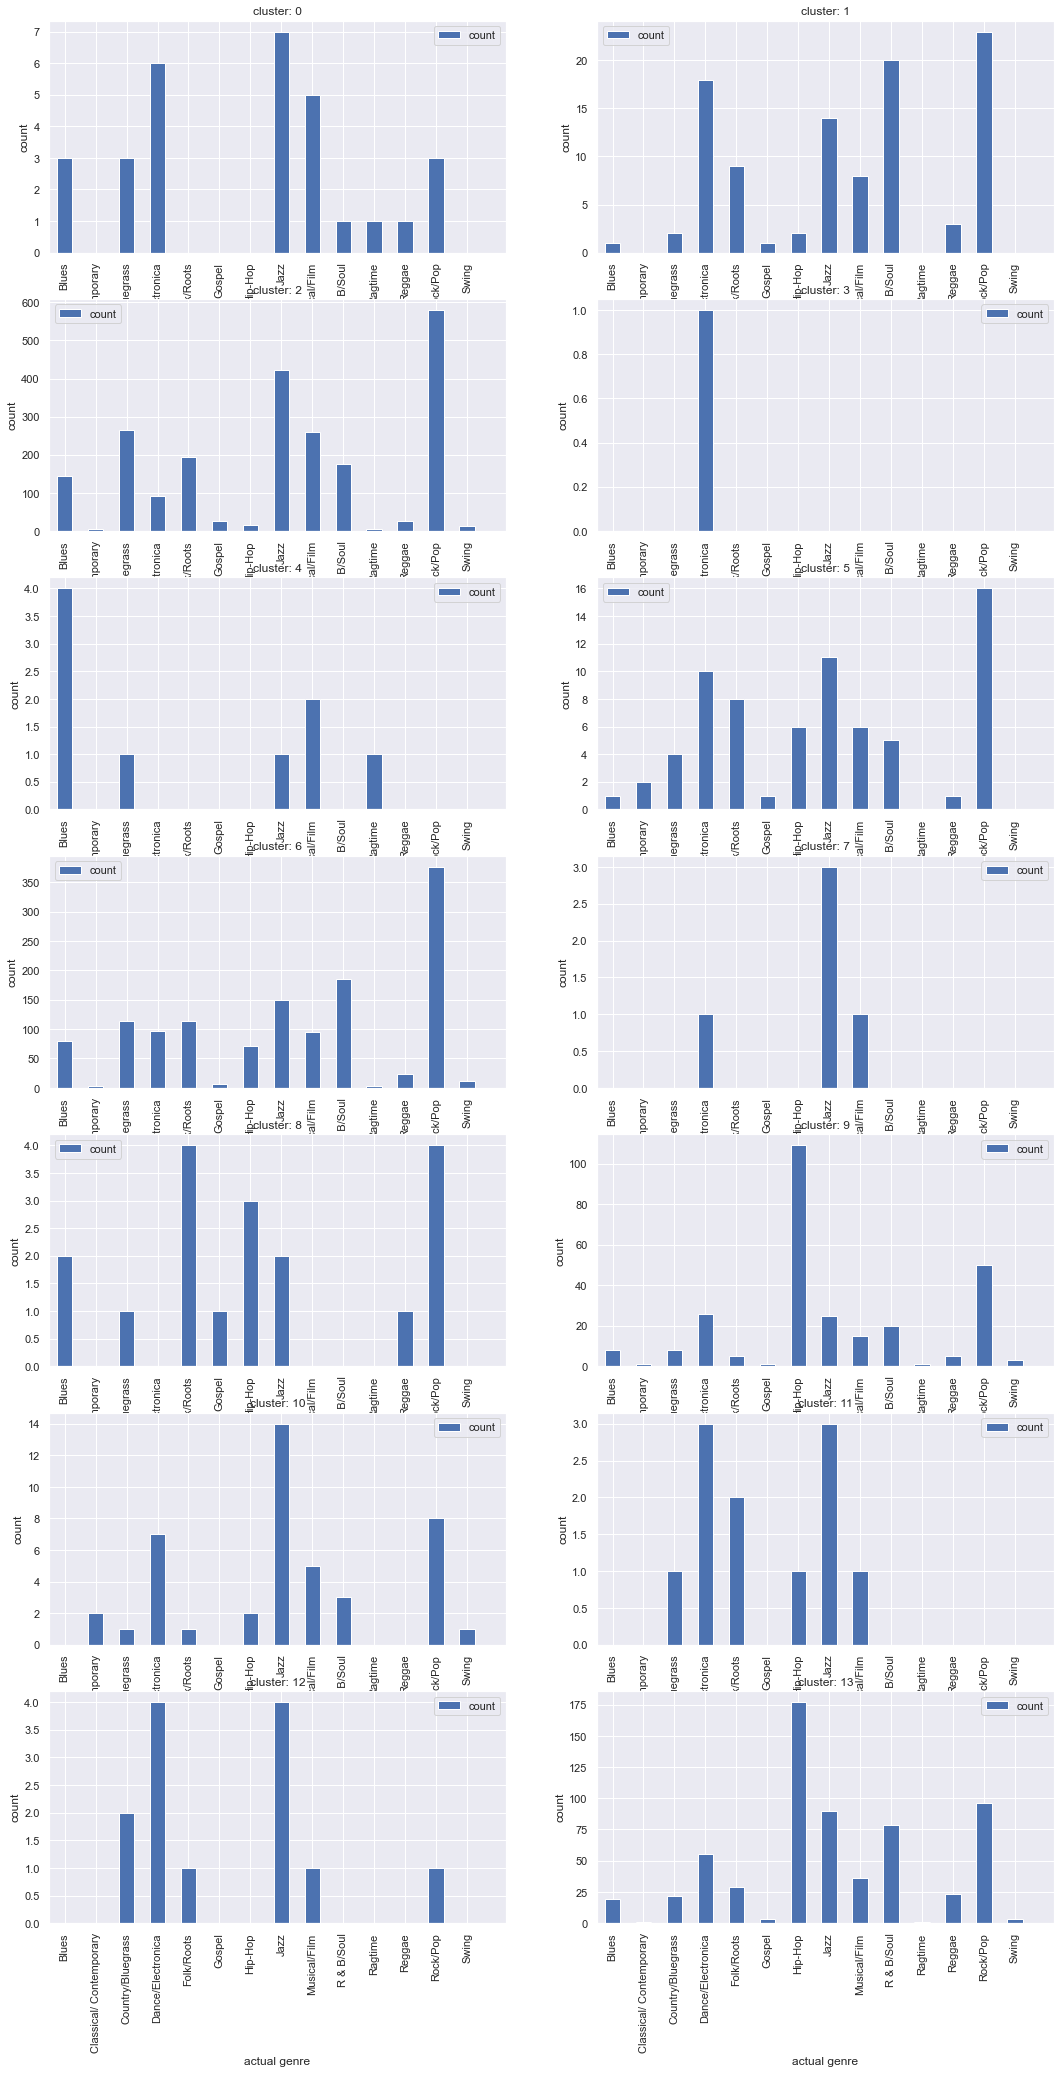

In [300]:
f_hist300 = plot_histogram(model_kmean300)

In [304]:
f_hist300.savefig(r'assets/hist_google300.png')

In [301]:
# dimensionality reduction for viz
import umap
data300 = emb300.values
# using UMAP as manifold model
# fig, ax = plt.subplots(figsize=(10, 10))
model_viz300 = umap.UMAP(n_neighbors=20, n_components=3)
reduced_emb300 = model_viz300.fit_transform(data300)

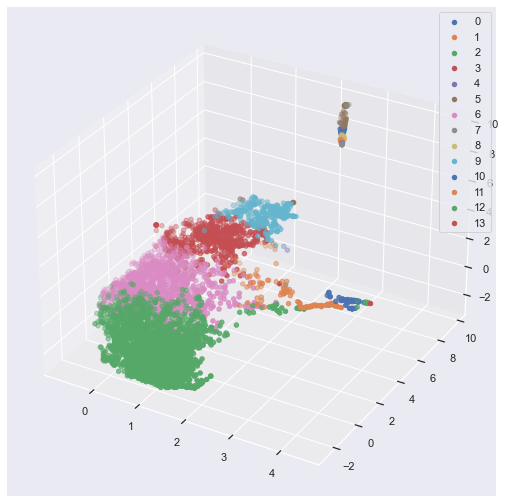

In [303]:
a = pd.DataFrame({'x':reduced_emb300[:,2], 
                  'y':reduced_emb300[:,2], 
                  'z':reduced_emb300[:,0], 
                  'label':model_kmean300.labels_})

plt.figure('K-Means on lyrics', figsize=(12,9))
ax = plt.axes(projection = '3d')

for i in range(model_kmean300.n_clusters):
    each = a[a.label==i][list('xyz')].values
    ax.scatter(each[:,2],each[:,1],each[:,0], label=f'{i}')

ax.legend()
plt.savefig(r'assets/3dviz_google300.png')
plt.show()

In [314]:
w.similar_by_word('programing')

[('programming', 0.8606169819831848),
 ('broadcasts', 0.5612195730209351),
 ('primetime_programming', 0.5569683313369751),
 ('Programming', 0.5567260980606079),
 ('telecasts', 0.531574010848999),
 ('NLP_neuro_linguistic', 0.5234977602958679),
 ('primetime', 0.522620677947998),
 ('longform_programming', 0.5163344144821167),
 ('affils', 0.506186842918396),
 ('MNTV', 0.5057681202888489)]

# Ver 4: removing those labels with small size 

In [311]:
# lets try removing those small samples 
gen, gen_count = np.unique(song.genre, return_counts=True)
meta_df = pd.DataFrame({'genre':gen, 'count':gen_count}).sort_values('count')
new_genre = meta_df[meta_df['count'] > 200]
new_genre

,genre,count
0,Blues,262
3,Dance/Electronica,319
4,Folk/Roots,365
6,Hip-Hop,386
2,Country/Bluegrass,424
8,Musical/Film,434
9,R & B/Soul,489
7,Jazz,745
12,Rock/Pop,1157


# Ver 5: using google's universal sentence encoder
[https://tfhub.dev/s?module-type=text-embedding]()


[https://towardsdatascience.com/use-cases-of-googles-universal-sentence-encoder-in-production-dd5aaab4fc15#:%7E:text=The%20Universal%20Sentence%20Encoder%20encodes,and%20other%20natural%20language%20tasks.&text=It%20comes%20with%20two%20variations,Deep%20Averaging%20Network%20(DAN).](https://towardsdatascience.com/use-cases-of-googles-universal-sentence-encoder-in-production-dd5aaab4fc15#:%7E:text=The%20Universal%20Sentence%20Encoder%20encodes,and%20other%20natural%20language%20tasks.&text=It%20comes%20with%20two%20variations,Deep%20Averaging%20Network%20(DAN).)

In [4]:
import sys
sys.path.insert(0, 'E:\\Download\\universal-sentence-encoder')

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.compat.v1.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.compat.v1.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})

embed_fn = embed_useT(sys.path[0])
messages = [
    "we are sorry for the inconvenience",
    "we are sorry for the delay",
    "we regret for your inconvenience",
    "we don't deliver to baner region in pune",
    "we will get you the best possible rate"
]
embed_fn(messages)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


array([[ 0.00021284, -0.04443966,  0.03926146, ...,  0.04830161,
        -0.11913303,  0.03370819],
       [ 0.01778567, -0.05192029, -0.00792321, ..., -0.01799903,
        -0.09819182,  0.06020731],
       [-0.00748426, -0.02401579,  0.01762747, ...,  0.09334016,
        -0.11837555,  0.00603597],
       [-0.03505318, -0.01932573, -0.03248611, ...,  0.0035643 ,
        -0.08239804,  0.03887841],
       [-0.051118  , -0.0309066 ,  0.03542013, ..., -0.013439  ,
        -0.10434885, -0.03150059]], dtype=float32)

In [163]:
messages = [
    "Women there don't treat you mean in Abilene my Abilene",
    "(Women there don't treat you mean) in Abilene my Abilene",
    '-we are sorry for the inconvenience-'
]
encoding_matrix = embed_fn(messages)
import numpy as np
np.inner(encoding_matrix, encoding_matrix)
# it takes care of puctuation ??

array([[0.99999994, 0.99999994, 0.06448288],
       [0.99999994, 0.99999994, 0.06448288],
       [0.06448288, 0.06448288, 0.9999997 ]], dtype=float32)

In [7]:
df = song.copy()
# df.lyrics = df.lyrics.apply(getSentence) # splitting sentences
df

,title,genre,lyrics
0,Abilene,Country/Bluegrass,Abilene Abilene prettiest town I've ever seen\...
1,Above And Beyond (The Call Of Love),Country/Bluegrass,Well I'll give you love that's above and beyon...
2,AC/DC Current,Jazz,"Y'all know me, still the same Eevee\nThe old 1..."
3,Acadian Driftwood,Folk/Roots,The war was over\nAnd the spirit was broken\nT...
4,Ac-Cent-Tchu-Ate The Positive,Swing,"Gather 'round me, everybody\nGather 'round me,..."
...,...,...,...
4754,Zeebob,Jazz,Part One Chapter 10\nTo Kill a Mockingbird\n\n...
4755,Zig Zag Wanderer,Rock/Pop,"Zig zag\n\nZig zag wanderer, zig zag wanderer\..."
4756,Ziggy Stardust,Rock/Pop,Ground Control to Major Tom\nGround Control to...
4757,Zip-A-Dee-Doo-Dah,Musical/Film,"Zip-a-dee-doo-dah\nZip-a-dee-yae\nMy, my, my, ..."


In [11]:
r = []
for row in df.lyrics:
    r.append(remove_punct(row))

(0.0, 4500.0)

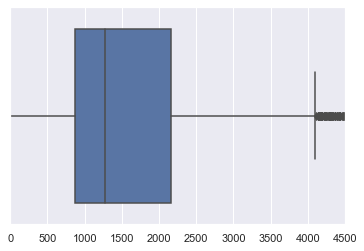

In [12]:
r_len = [*map(len, r)]
ax = sns.boxplot(x=r_len)
ax.set_xlim([0, 4500])

In [13]:
from scipy.stats import iqr
upper = np.quantile(r_len, q=0.75) + 1.5*iqr(r_len) # getting the cutoff values
upper

4102.75

In [57]:
# data like this needs to be removed
df.lyrics[df[r_len == np.max(r_len)].index[0]]

'Wage Labour and Capital\nKARL MARX\n\xa0 \xa0 \xa0 \xa0 Shortly after adumbrating the materialist conception of history in the 1844 manuscripts and formulating it comprehensively in Part I of The German Ideology, Marx turned to the economic studies that were going to preoccupy him in the ensuing years. This did not signify any change of interests or outlook but was the logical outgrowth of the position taken in his earlier writings. If the thesis on "alienated labor" was to be made scientifically cogent and if the expectation of coming proletarian revolution was to be based upon it, he needed to show the capital-labor relationship, which he took to be the core of the bourgeois socio-economic system, to be dialectically self-destructive, i.e. , transitory by virtue of its inner dynamics of development. The first work in which he attempted this analysis was Wage Labour and Capital.\n\xa0 \xa0 \xa0 \xa0 Having first presented it in lectures to a German workers\' society in Brussels in De

In [161]:
# By trial and error, 200 gives a good filter for lower bound
i = 200
while True:
    if any(np.array(r_len) == i):
        break
    i = i+1
lower = np.float64(i) # for comparison purpose in the filter 
df.lyrics[df[np.array(r_len) == i].index[0]]

'Down by the Old Mill Stream\nWhere I first met you\nWith your eyes of blue\nDressed in gingham too\nIt was there I knew\nThat you loved me true\nYou were sixteen, my village queen\nDown by the old mill stream!'

In [80]:
# data cleaning
# removing those songs with too long of lyrics 
# API returns unrelavant information for some songs
reduced_df = df.iloc[(r_len >= lower) & (r_len <= upper)].reset_index(drop=True)
reduced_df

,title,genre,lyrics
0,Abilene,Country/Bluegrass,Abilene Abilene prettiest town I've ever seen\...
1,Above And Beyond (The Call Of Love),Country/Bluegrass,Well I'll give you love that's above and beyon...
2,AC/DC Current,Jazz,"Y'all know me, still the same Eevee\nThe old 1..."
3,Acadian Driftwood,Folk/Roots,The war was over\nAnd the spirit was broken\nT...
4,Ac-Cent-Tchu-Ate The Positive,Swing,"Gather 'round me, everybody\nGather 'round me,..."
...,...,...,...
4407,You've Really Got A Hold On Me,R & B/Soul,I don't like you\nBut I love you\nSeems that I...
4408,Zig Zag Wanderer,Rock/Pop,"Zig zag\n\nZig zag wanderer, zig zag wanderer\..."
4409,Ziggy Stardust,Rock/Pop,Ground Control to Major Tom\nGround Control to...
4410,Zip-A-Dee-Doo-Dah,Musical/Film,"Zip-a-dee-doo-dah\nZip-a-dee-yae\nMy, my, my, ..."


In [81]:
# assuming that lines are separated via '\n'
lyrics = reduced_df.lyrics.apply(lambda x: x.split('\n'))
lyrics

0       [Abilene Abilene prettiest town I've ever seen...
1       [Well I'll give you love that's above and beyo...
2       [Y'all know me, still the same Eevee, The old ...
3       [The war was over, And the spirit was broken, ...
4       [Gather 'round me, everybody, Gather 'round me...
                              ...                        
4407    [I don't like you, But I love you, Seems that ...
4408    [Zig zag, , Zig zag wanderer, zig zag wanderer...
4409    [Ground Control to Major Tom, Ground Control t...
4410    [Zip-a-dee-doo-dah, Zip-a-dee-yae, My, my, my,...
4411    [Brewton Alabama at The Colonial Inn, Hot day ...
Name: lyrics, Length: 4412, dtype: object

In [16]:
len(embed_fn(lyrics[0]).sum(axis=0))

512

In [82]:
dict512 = {}
for i in range(len(reduced_df)):
    dict512[i] = embed_fn(lyrics[i]).sum(axis=0)
    # verifying that this currrent lyrics has vectorized properly
    if len(dict512[i]) != 512:
        assert False

In [84]:
emb512 = pd.DataFrame.from_dict(dict512, 'index')
emb512

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.417694,-0.273301,-0.497077,0.279281,-0.134195,0.280757,-0.055674,0.056154,-0.306759,-0.087069,...,0.004343,0.031972,-0.541976,-0.080049,0.393078,-0.327780,-0.255760,-0.214880,-0.696624,0.119638
1,0.015245,-0.084665,-0.224842,-0.126173,0.145863,-0.061164,0.140698,0.376807,-0.750624,0.289407,...,0.268821,-0.061173,0.496768,-0.107356,0.371449,-0.195768,-0.054972,0.196802,-0.054776,-0.138081
2,0.331611,1.485453,1.152285,-0.331923,-1.566551,1.580761,1.329524,1.457713,-6.406297,1.410015,...,-0.446685,0.776718,-0.593929,-3.392457,0.224442,-0.603661,-0.607495,1.290313,-0.729140,-0.472279
3,0.159585,-1.529899,-1.758890,0.398868,-1.529813,1.512568,-1.126790,-0.602566,-8.825212,1.046128,...,0.227197,1.649740,-0.524690,-4.846576,-0.308326,0.674665,-0.374880,4.465254,-3.207039,-0.241662
4,0.182983,0.892556,-0.014835,-0.711480,-0.928076,0.181591,-0.028055,0.702775,-3.740453,0.875185,...,-1.028350,0.378045,1.005818,-1.134331,-0.366799,-0.625369,0.107308,1.411441,-1.432549,-0.457847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,0.304744,-1.142246,-0.603432,0.743110,-0.885288,0.478596,-1.000746,0.774807,-6.093728,1.788039,...,1.009688,-0.043094,2.214637,-1.612269,0.640604,0.777373,-0.300986,2.461582,-1.017403,0.111820
4408,0.478233,-0.303699,-0.155158,-0.982245,-0.987329,0.830471,0.135780,0.813865,-3.198085,0.905359,...,-0.395852,0.462762,-0.077660,-2.242867,-0.433433,-0.299582,-0.201025,1.750647,-0.104683,0.453580
4409,0.538835,-0.023149,-0.351055,0.601294,-0.802972,0.202729,-0.189794,1.065207,-3.122552,0.834161,...,-0.344439,-0.708640,0.496340,-1.653402,-0.579765,0.297186,0.459402,1.709704,-0.390108,-0.729302
4410,0.309442,-0.668647,-0.064661,-0.678259,-0.140431,1.337882,-0.042931,0.197784,-3.821627,0.801547,...,0.553386,0.969614,0.627140,-1.718683,0.054458,-0.428395,0.082142,0.601738,-1.293645,0.883978


In [86]:
from sklearn.cluster import KMeans
cluster_num = 14
model_kmean512 = KMeans(n_clusters=cluster_num, init='random', max_iter=300, tol=1e-04, random_state=0)
model_kmean512.fit(emb512.values)

KMeans(init='random', n_clusters=14, random_state=0)

In [87]:
gen, gen_count = np.unique(reduced_df.genre, return_counts=True)
p = pd.DataFrame({'genre':gen, 'count':gen_count}).set_index('genre')
p

,count
genre,
Blues,250
Classical/ Contemporary,9
Country/Bluegrass,408
Dance/Electronica,278
Folk/Roots,343
Gospel,36
Hip-Hop,309
Jazz,688
Musical/Film,404


In [460]:
## Normalizing the histogram to take care of unbalanced samples
# df_temp = pd.DataFrame({'genre': reduced_df.genre.unique(), 'count':[0]*14}).set_index('genre')
# val, count = np.unique(reduced_df['genre'].iloc[model_kmean512.labels_==0], return_counts=True)
# (df_temp + pd.DataFrame({'genre':val, 'count':count}).set_index('genre'))/p

,count
genre,
Blues,0.003984
Classical/ Contemporary,NaN
Country/Bluegrass,0.022059
Dance/Electronica,0.066667
Folk/Roots,0.066474
Gospel,NaN
Hip-Hop,0.090615
Jazz,0.030303
Musical/Film,0.054054


In [120]:
def plot_histogram(model, df = df, normalize=False):
    # plotting histogram for each cluster
    n_clusters = model.n_clusters
    fig, axes = plt.subplots(nrows=np.int(np.ceil(n_clusters/2)), 
                             ncols=2, 
                             sharex = False,
                             figsize=(18,5*np.int(np.ceil(n_clusters/2)))
                            )
    df_temp = pd.DataFrame({'genre': df.genre.unique(), 'count':[0]*n_clusters}).set_index('genre')
    if normalize:
        gen, gen_count = np.unique(df.genre, return_counts=True)
        p = pd.DataFrame({'genre':gen, 'count':gen_count}).set_index('genre')
    for i in range(n_clusters):
        ax = axes[i//2, i%2]
        val, count = np.unique(df['genre'].iloc[model.labels_==i], return_counts=True)
        if normalize:
            ((df_temp + pd.DataFrame({'genre':val, 'count':count}).set_index('genre'))/p).rename({'count':'percentage'}, axis='columns').plot(kind='bar', ax=ax)
        else:
            (df_temp + pd.DataFrame({'genre':val, 'count':count}).set_index('genre')).plot(kind='bar', ax=ax)
        ax.set_title(f'cluster: {i}')
        if normalize:
            ax.set_ylabel('percentage (wrt each genre)')
        else:
            ax.set_ylabel('count')
        ax.set_xlabel('actual genre')
        ax.set_xlim(right=n_clusters + 0.25)
#         ax.set_xticks([*range(n_clusters)])
    return fig

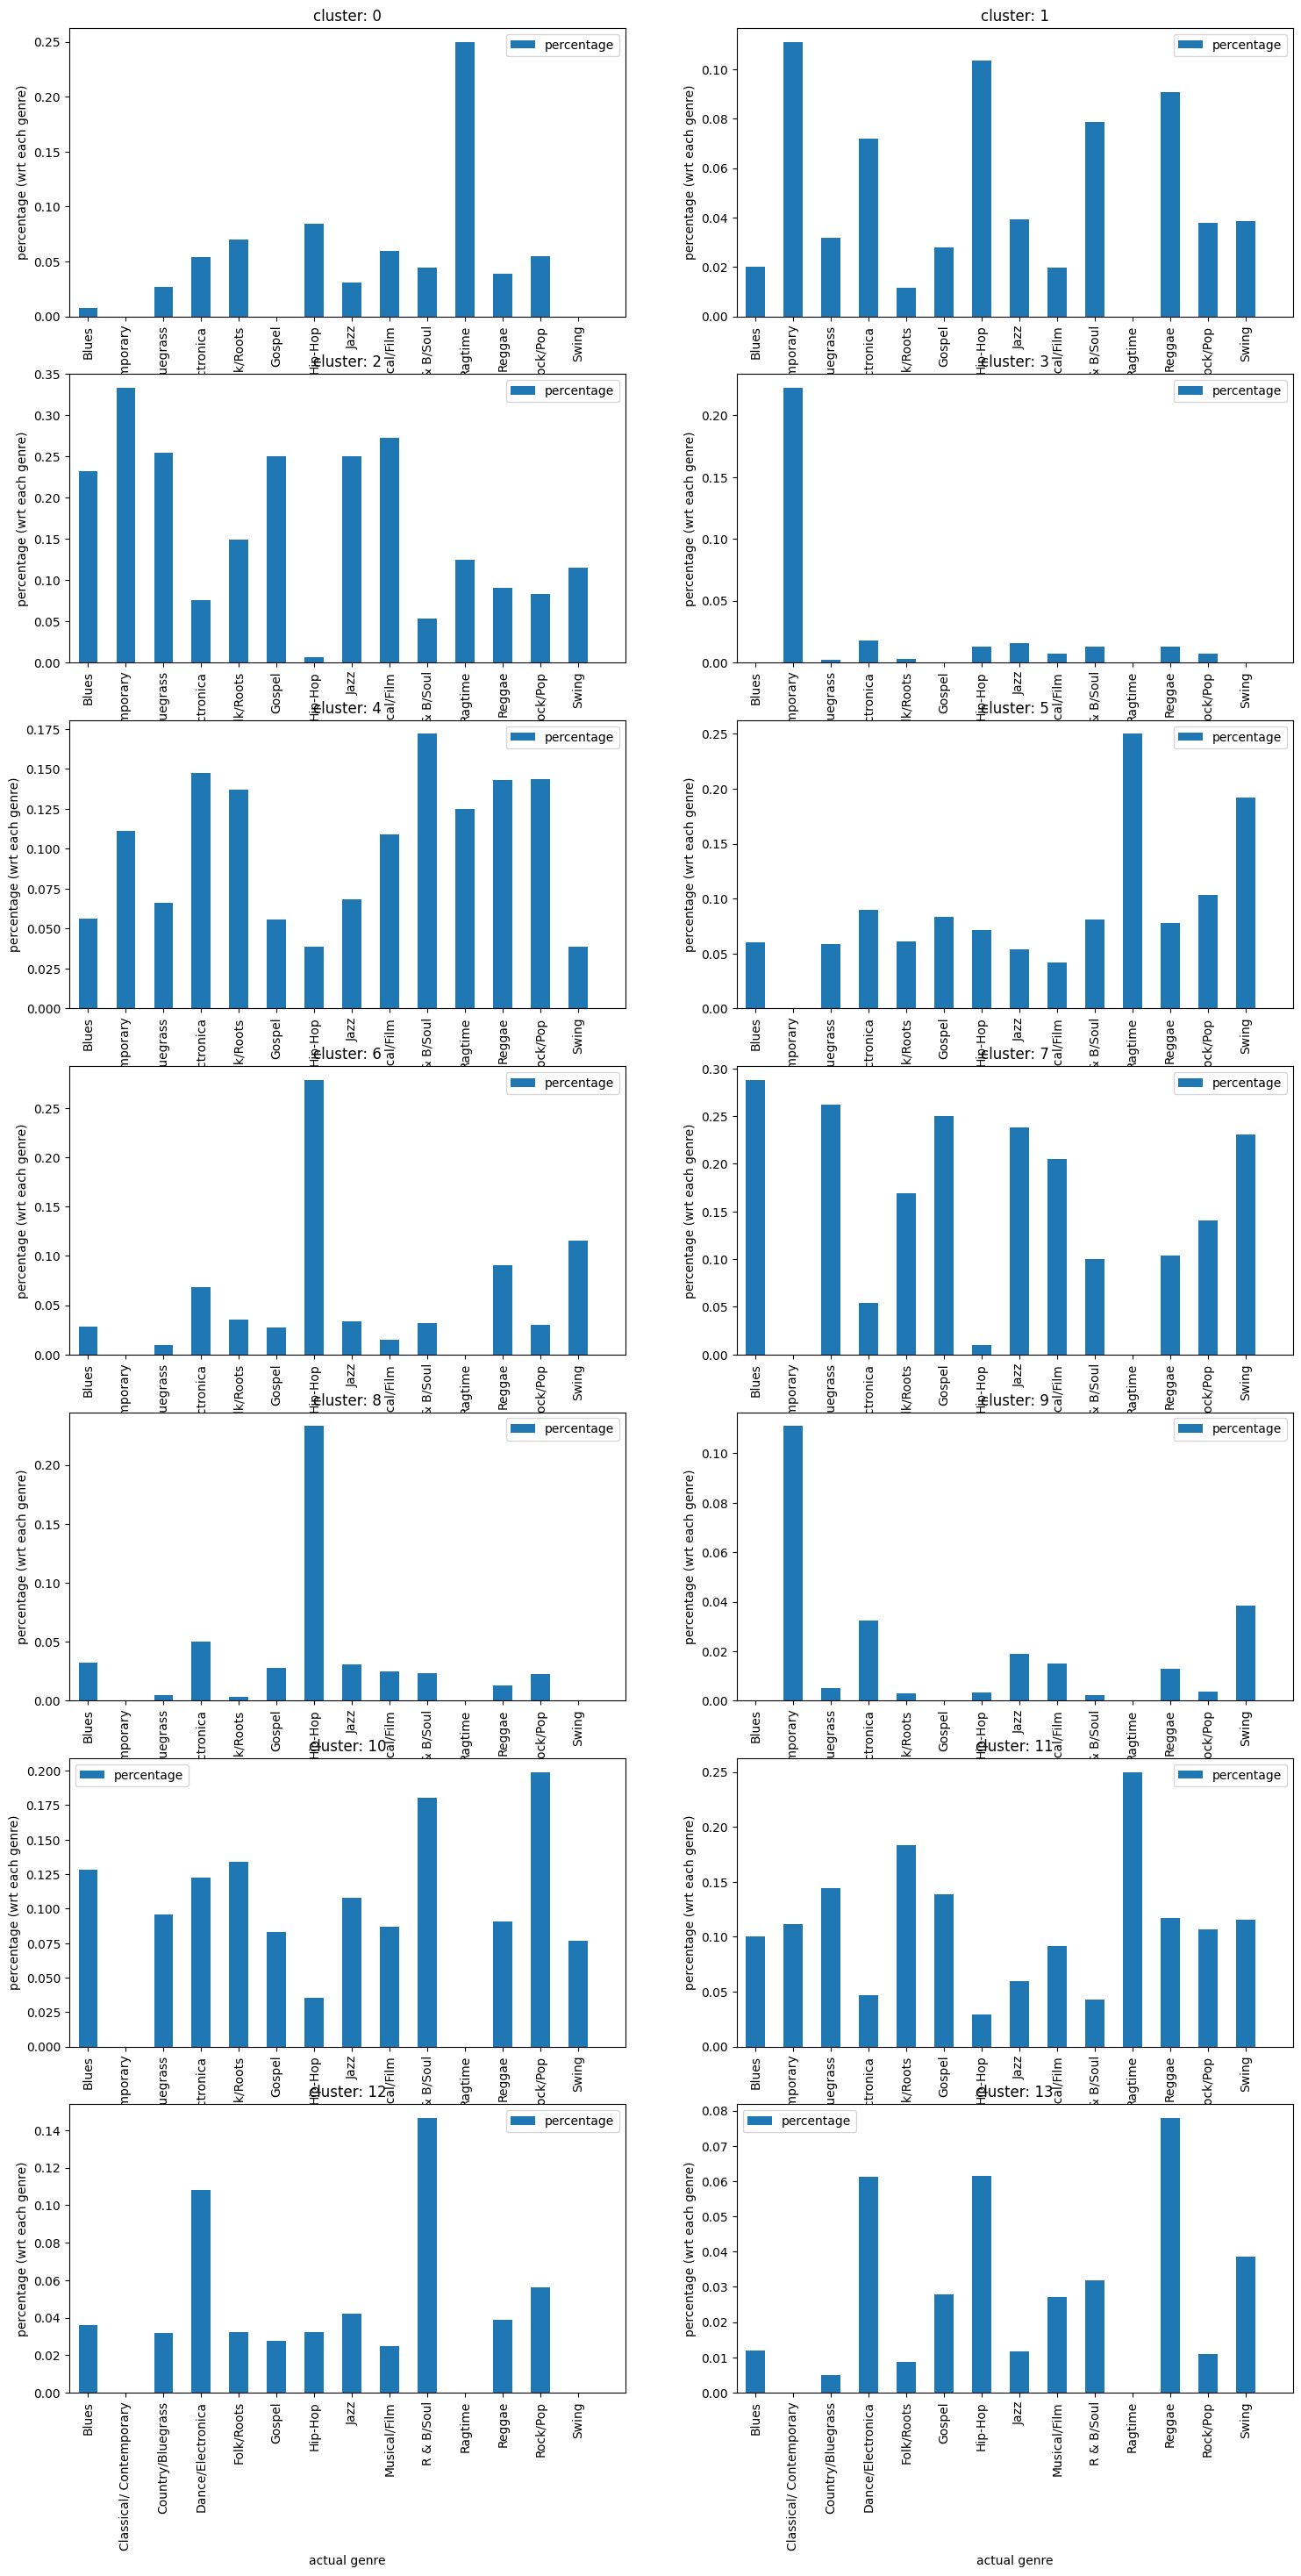

In [121]:
f_hist512 = plot_histogram(model_kmean512, df=reduced_df, normalize=True)

In [91]:
# dimensionality reduction for viz
import umap
data512 = emb512.values
# using UMAP as manifold model 
model_viz512 = umap.UMAP(n_neighbors=20, n_components=3)
reduced_emb512 = model_viz512.fit_transform(data512)

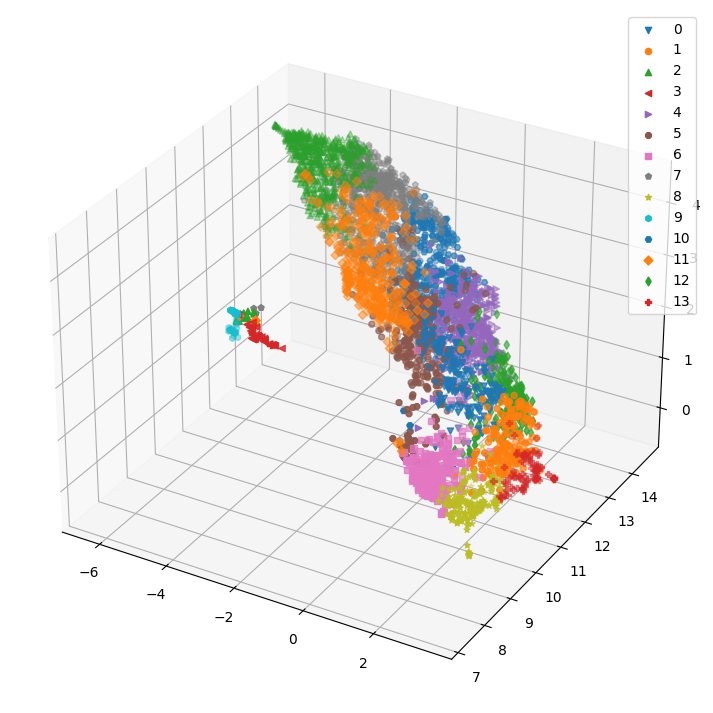

In [112]:
# sns.color_palette("rocket", as_cmap=True)
plt.style.use('default')


a = pd.DataFrame({'x':reduced_emb512[:,1], 
                  'y':reduced_emb512[:,2], 
                  'z':reduced_emb512[:,0], 
                  'label':model_kmean512.labels_})

plt.figure('K-Means on lyrics', figsize=(12,9))
ax = plt.axes(projection = '3d')

filled_markers = ('v', 'o', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

for i in range(model_kmean512.n_clusters):
    each = a[a.label==i][list('xyz')].values
    ax.scatter(each[:,2],each[:,1],each[:,0], marker=filled_markers[i], label=f'{i}')

ax.legend()
# plt.savefig(r'assets/3dviz.png')
plt.show()

In [143]:
# getting distances from each cluster center for analysis
distance_kmeans512 = model_kmean512.transform(emb512.values)
distance_kmeans512 = pd.DataFrame({f'distance_from_{i}':distance_kmeans512[:,i] for i in range(model_kmean512.n_clusters)})
distance_kmeans512

,distance_from_0,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,distance_from_11,distance_from_12,distance_from_13
0,35.440069,46.921564,8.279431,44.286254,26.701687,24.756050,34.774142,13.400244,50.750989,47.704286,19.310042,17.362258,36.548720,64.671866
1,33.018232,43.892463,5.528550,43.161053,23.434653,22.205076,32.507139,10.069914,48.393857,46.786509,15.931793,15.204054,32.993658,61.617486
2,22.555268,23.912034,39.927014,42.229402,27.254322,26.522448,21.249708,35.553844,23.457340,50.323286,31.442167,31.844409,24.562392,35.204543
3,29.263347,29.272349,52.688524,45.928447,38.167330,38.216966,36.975743,48.055015,34.344101,54.882905,43.677734,43.321950,34.811938,33.206017
4,19.684011,29.865785,16.855359,37.666587,13.572108,13.643916,22.381223,13.319335,35.891147,45.108402,11.021747,12.805700,21.503801,47.080662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,19.812609,18.263011,33.595834,40.902487,17.809978,21.644573,23.440555,28.360998,28.641472,48.652201,23.008807,27.118963,11.993139,31.587195
4408,20.999004,32.010209,17.997442,37.545201,17.494359,14.146659,21.060084,15.653549,34.872001,43.635519,14.888822,12.789480,24.664800,48.904727
4409,20.003513,31.427295,16.505490,37.326130,14.711143,13.688709,22.832387,13.502524,36.913168,44.815114,12.261244,11.376855,22.748508,48.640005
4410,18.812609,28.270103,18.068998,33.229649,13.492755,11.887450,20.913180,14.359588,33.929661,41.384539,12.144060,13.013047,20.188688,44.771752


In [159]:
# sort based on distance from center of n^th cluster
nth_cluster = 0
reduced_df.iloc[distance_kmeans512[f'distance_from_{nth_cluster}'].sort_values().index].join(distance_kmeans512[f'distance_from_{nth_cluster}'])

,title,genre,lyrics,distance_from_0
4282,Written In The Stars,Musical/Film,"Oh, written in the stars\nA million miles away...",11.111991
2053,Kashmir,Rock/Pop,"Oh, let the sun beat down upon my face\nWith s...",11.856929
848,Done By The Forces Of Nature,Hip-Hop,Born buck-naked out my mother's womb\nA man co...,12.090315
671,Conception,Jazz,"Where I go, where I go from here?\nOh I, know ...",12.230887
1518,Hotel California,Rock/Pop,On a dark desert highway\nCool wind in my hair...,12.376775
...,...,...,...,...
2504,Mojuba,Jazz,"São vários marginal alado, consequência é de o...",77.034522
2394,Mame,Jazz,"Bla, bla, bla, bla, bla, bla\nEy, yo', yo', yo...",78.934502
145,Anything You Can Do,Musical/Film,Anything you can do I can do better\nI can do ...,83.468780
963,El Nino,Dance/Electronica,"¡Prrrra!\nGang, damn, esskeetit, ¡wuh-uh! (¡Pr...",83.828103


In [158]:
print(reduced_df.lyrics.iloc[2053])

Oh, let the sun beat down upon my face
With stars to fill my dreams
I am a traveler of both time and space
To be where I have been
Sit with elders of the gentle race
This world has seldom seen
Talk of days for which they sit and wait
All will be revealed

Talk and song from tongues of lilting grace
Whose sounds caress my ear
But not a word I heard could I relate
The story was quite clear
Oh, oh
Oh, oh

Ooh, baby, I been flying
No yeah, mama, there ain't no denying
Oh, ooh, yeah I've been flying
Mama, mama, ain't no denying, no denying

Oh, all I see turns to brown
As the sun burns the ground
And my eyes fill with sand
As I scan this wasted land
Trying to find, trying to find, where I've been

Oh, pilot of the storm who leaves no trace
Like thoughts inside a dream
Here is the path that led me to that place
Yellow desert stream
My Shangri-La beneath the summer moon
I will return again
Sure as the dust that floats high in June
When movin' through Kashmir

Oh, father of the four winds, fil

***
## CLUSTER ANALYSIS

In [143]:
# getting distances from each cluster center for analysis
distance_kmeans512 = model_kmean512.transform(emb512.values)
distance_kmeans512 = pd.DataFrame({f'distance_from_{i}':distance_kmeans512[:,i] for i in range(model_kmean512.n_clusters)})
distance_kmeans512

,distance_from_0,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,distance_from_11,distance_from_12,distance_from_13
0,35.440069,46.921564,8.279431,44.286254,26.701687,24.756050,34.774142,13.400244,50.750989,47.704286,19.310042,17.362258,36.548720,64.671866
1,33.018232,43.892463,5.528550,43.161053,23.434653,22.205076,32.507139,10.069914,48.393857,46.786509,15.931793,15.204054,32.993658,61.617486
2,22.555268,23.912034,39.927014,42.229402,27.254322,26.522448,21.249708,35.553844,23.457340,50.323286,31.442167,31.844409,24.562392,35.204543
3,29.263347,29.272349,52.688524,45.928447,38.167330,38.216966,36.975743,48.055015,34.344101,54.882905,43.677734,43.321950,34.811938,33.206017
4,19.684011,29.865785,16.855359,37.666587,13.572108,13.643916,22.381223,13.319335,35.891147,45.108402,11.021747,12.805700,21.503801,47.080662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,19.812609,18.263011,33.595834,40.902487,17.809978,21.644573,23.440555,28.360998,28.641472,48.652201,23.008807,27.118963,11.993139,31.587195
4408,20.999004,32.010209,17.997442,37.545201,17.494359,14.146659,21.060084,15.653549,34.872001,43.635519,14.888822,12.789480,24.664800,48.904727
4409,20.003513,31.427295,16.505490,37.326130,14.711143,13.688709,22.832387,13.502524,36.913168,44.815114,12.261244,11.376855,22.748508,48.640005
4410,18.812609,28.270103,18.068998,33.229649,13.492755,11.887450,20.913180,14.359588,33.929661,41.384539,12.144060,13.013047,20.188688,44.771752


In [159]:
# sort based on distance from center of n^th cluster
nth_cluster = 0
reduced_df.iloc[distance_kmeans512[f'distance_from_{nth_cluster}'].sort_values().index].join(distance_kmeans512[f'distance_from_{nth_cluster}'])

,title,genre,lyrics,distance_from_0
4282,Written In The Stars,Musical/Film,"Oh, written in the stars\nA million miles away...",11.111991
2053,Kashmir,Rock/Pop,"Oh, let the sun beat down upon my face\nWith s...",11.856929
848,Done By The Forces Of Nature,Hip-Hop,Born buck-naked out my mother's womb\nA man co...,12.090315
671,Conception,Jazz,"Where I go, where I go from here?\nOh I, know ...",12.230887
1518,Hotel California,Rock/Pop,On a dark desert highway\nCool wind in my hair...,12.376775
...,...,...,...,...
2504,Mojuba,Jazz,"São vários marginal alado, consequência é de o...",77.034522
2394,Mame,Jazz,"Bla, bla, bla, bla, bla, bla\nEy, yo', yo', yo...",78.934502
145,Anything You Can Do,Musical/Film,Anything you can do I can do better\nI can do ...,83.468780
963,El Nino,Dance/Electronica,"¡Prrrra!\nGang, damn, esskeetit, ¡wuh-uh! (¡Pr...",83.828103


In [158]:
print(reduced_df.lyrics.iloc[2053])

Oh, let the sun beat down upon my face
With stars to fill my dreams
I am a traveler of both time and space
To be where I have been
Sit with elders of the gentle race
This world has seldom seen
Talk of days for which they sit and wait
All will be revealed

Talk and song from tongues of lilting grace
Whose sounds caress my ear
But not a word I heard could I relate
The story was quite clear
Oh, oh
Oh, oh

Ooh, baby, I been flying
No yeah, mama, there ain't no denying
Oh, ooh, yeah I've been flying
Mama, mama, ain't no denying, no denying

Oh, all I see turns to brown
As the sun burns the ground
And my eyes fill with sand
As I scan this wasted land
Trying to find, trying to find, where I've been

Oh, pilot of the storm who leaves no trace
Like thoughts inside a dream
Here is the path that led me to that place
Yellow desert stream
My Shangri-La beneath the summer moon
I will return again
Sure as the dust that floats high in June
When movin' through Kashmir

Oh, father of the four winds, fil

In [346]:
def sum_vector(list_of_sentences, embed_fn=embed_fn):
    temp = embed_fn([list_of_sentences[0]])
    for each in list_of_sentences[1:]:
        temp = temp+embed_fn([each])
    return temp

In [ ]:
import re
def getSentence(text):
    w = text.strip()
    # replacing those EOS punctuations with full stop (period)
    w = re.sub(r'[\s]{0,10}[\:\,\?\;\.\n]{1,10}[\s]{0,10}', '.', w) 
    return w.split('.')

In [ ]:
re.sub(r'[\s]{0,10}[\:\,\?\;\.\n]{1,10}[\s]{0,10}', '.', 'I love you: you love me ?,   do you feel the same.\nhere')

In [ ]:
df = song.copy()
df.lyrics = df.lyrics.apply(getSentence) # splitting sentences
df

In [347]:
# dict512 = {}

emb512 = pd.DataFrame.from_dict({i: sum_vector(df.lyrics[i]) for i in range(len(df))}, 'index')
emb512

ValueError: Must pass 2-d input. shape=(4759, 1, 512)

In [339]:
cluster_num = 14
model_kmean512 = KMeans(n_clusters=cluster_num, init='random', max_iter=300, tol=1e-04, random_state=0)
model_kmean512.fit(emb512.values)

<ipython-input-339-4e10f794e8ff>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  model_kmean512.fit(emb512.values)


KMeans(init='random', n_clusters=14, random_state=0)

In [305]:
w.similar_by_word('tough')

[('tougher', 0.716796338558197),
 ('toughest', 0.7013960480690002),
 ('difficult', 0.6777452826499939),
 ('Tough', 0.6753776669502258),
 ('hard', 0.6342881917953491),
 ('tricky', 0.6076676845550537),
 ('rough', 0.5864415168762207),
 ('challenging', 0.5689979791641235),
 ('good', 0.558531641960144),
 ('harder', 0.5296537280082703)]

In [286]:
word_vectors.similar_by_word('tough')

[('tougher', 0.813800573348999),
 ('hard', 0.7876509428024292),
 ('difficult', 0.7509691119194031),
 ('toughest', 0.7444600462913513),
 ('harder', 0.710999071598053),
 ('too', 0.7054933905601501),
 ('aggressive', 0.700206458568573),
 ('face', 0.6997044086456299),
 ('good', 0.6937756538391113),
 ('better', 0.6862656474113464)]

In [232]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
len(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pui_s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179